 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1555]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [1556]:
# Reading whale returns
csv_path = Path(r"/Users/ericondarza/Desktop/UM-MIA-FINTECH/Resources/whale_returns.csv")
df_whale = pd.read_csv(csv_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
df_whale

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [1557]:
# Count nulls
df_whale.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [1558]:
# Drop nulls
df_whale.dropna(inplace=True) 
df_whale.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [1559]:
# Reading algorithmic returns
csv_path_1 = Path(r"/Users/ericondarza/Desktop/UM-MIA-FINTECH/Resources/algo_returns.csv")
df_algo = pd.read_csv(csv_path_1, index_col='Date', parse_dates=True, infer_datetime_format=True)


In [1560]:
# Count nulls
df_algo.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [1561]:
# Drop nulls
df_algo.dropna(inplace=True)
df_algo.columns = ['Algorithm 1 ', 'Algorithm 2']
df_algo.isna().sum()

Algorithm 1     0
Algorithm 2     0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [1562]:
# Reading S&P 500 Closing Prices
csv_path_2 = Path(r"/Users/ericondarza/Desktop/UM-MIA-FINTECH/Resources/sp500_history.csv")
df_sp500 = pd.read_csv(csv_path_2, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [1563]:
# Check Data Types
print( f" {df_sp500['Close'][0]} {type(df_sp500['Close'][1])}")

 $2933.68 <class 'str'>


In [1564]:
# Fix Data Types
sp500_df2 = df_sp500['Close'].str.removeprefix("$").to_frame().astype(float)
sp500_df2.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [1565]:
# Calculate Daily Returns
sp500_returns = sp500_df2["Close"].pct_change()
sp500_returns.head()

Date
2019-04-23         NaN
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
Name: Close, dtype: float64

In [1566]:
# Drop nulls
sp500_returns.dropna(inplace=True)
sp500_returns.isnull().sum()

0

In [1567]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df2.rename(columns = {'Close':'S&P500 Close'}, inplace = True)
sp500_df2

,S&P500 Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


## Combine Whale, Algorithmic, and S&P 500 Returns

In [1568]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.

combined_df = pd.concat([df_whale, df_algo, sp500_returns], axis = 1 , join = 'inner')
combined_df.tail()






,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algorithm 1,Algorithm 2,Close
Date,,,,,,,
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

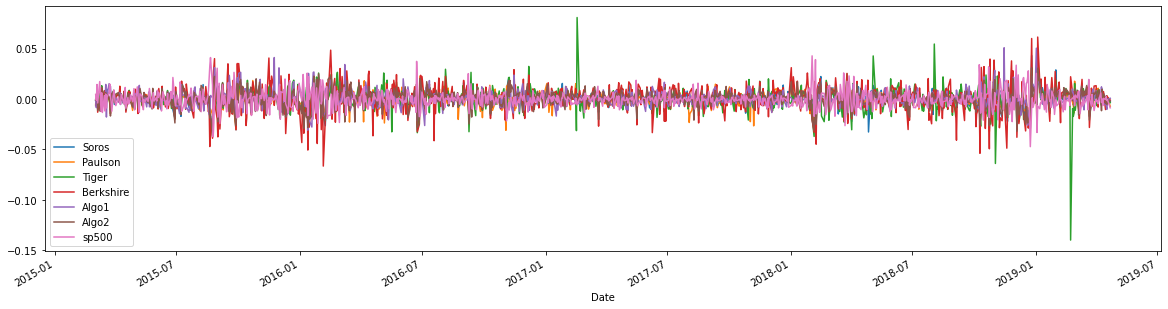

In [1569]:
# Plot daily returns of all portfolios
daily_returns = combined_df
daily_returns.columns = ['Soros', 'Paulson', 'Tiger', 'Berkshire', 'Algo1', 'Algo2','sp500']
daily_returns.plot(figsize=(20,5))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

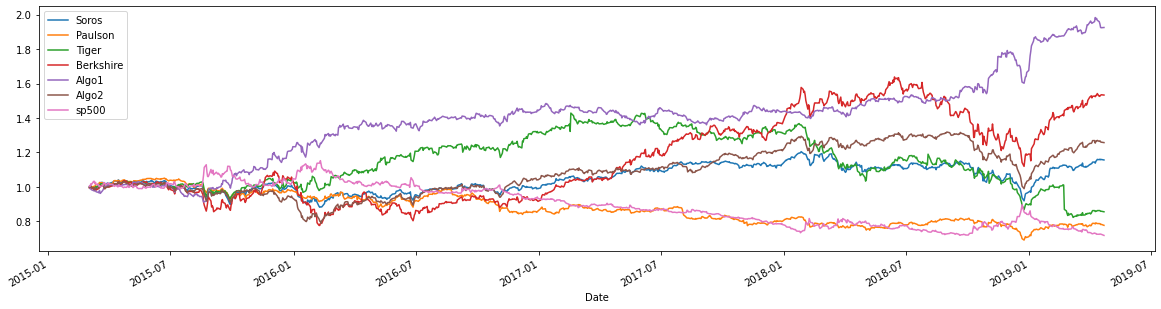

In [1570]:
# Calculate cumulative returns of all portfolios
cumul_returns = (1 + combined_df).cumprod()


# Plot cumulative returns
cumul_returns.plot(figsize=(20,5))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

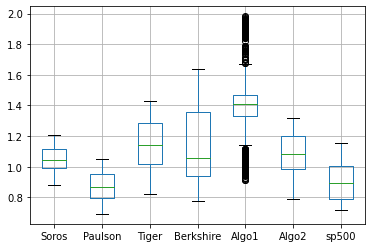

In [1571]:
# Box plot to visually show risk
cumul_returns.columns = ['Soros', 'Paulson', 'Tiger', 'Berkshire', 'Algo1', 'Algo2','sp500']
cumul_returns.boxplot()

### Calculate Standard Deviations

<AxesSubplot:>

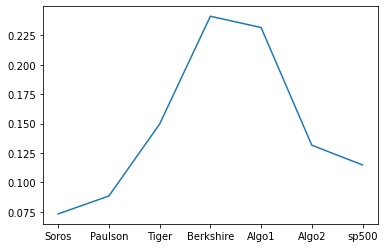

In [1572]:
# Calculate the daily standard deviations of all portfolios
cumul_returns_std = cumul_returns.std()
cumul_returns_std.plot()



### Determine which portfolios are riskier than the S&P 500

In [1573]:
# Calculate  the daily standard deviation of S&P 500
sp500 = cumul_returns_std['sp500']
index = 0
# Determine which portfolios are riskier than the S&P 500
for risk in cumul_returns_std:
    if risk == sp500:
        print(f'{cumul_returns_std.index[index]} Portofolio has as equal risk as S&P500')
    elif risk > sp500:
        print(f"{cumul_returns_std.index[index]} Portfolio has more risk than S&P500")
    elif risk < sp500:
        print(f"{cumul_returns_std.index[index]} Prtfolio has less risk than S&P500")
    else:
        print(f"{cumul_returns_std.index[index]} Portfolio has no enough data to determine risk")
    index += 1
 


Soros Prtfolio has less risk than S&P500
Paulson Prtfolio has less risk than S&P500
Tiger Portfolio has more risk than S&P500
Berkshire Portfolio has more risk than S&P500
Algo1 Portfolio has more risk than S&P500
Algo2 Portfolio has more risk than S&P500
sp500 Portofolio has as equal risk as S&P500


### Calculate the Annualized Standard Deviation

In [1574]:
# Calculate the annualized standard deviation (252 trading days)
annulized_std = cumul_returns_std * np.sqrt(252)

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling std for all portfolios with 21-day window'}, xlabel='Date'>

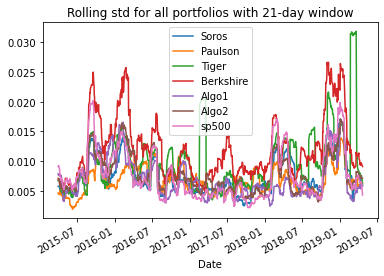

In [1575]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot(title='Rolling std for all portfolios with 21-day window')

### Calculate and plot the correlation

<AxesSubplot:title={'center':'Correlation for Newly Combined portfolios'}>

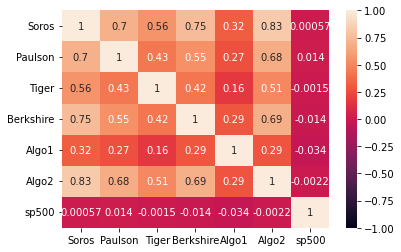

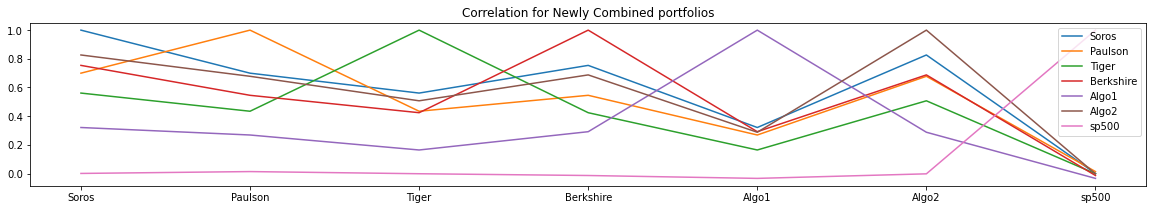

In [1576]:
# Calculate the correlation
import seaborn as sns
correlation = combined_df.corr()
sns.heatmap(correlation, vmin=-1, vmax=1,annot=True,)

# Display de correlation matrix
correlation.plot(figsize=(20,3), title='Correlation for Newly Combined portfolios')

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Beta trend of Algo 1'}, xlabel='Date'>

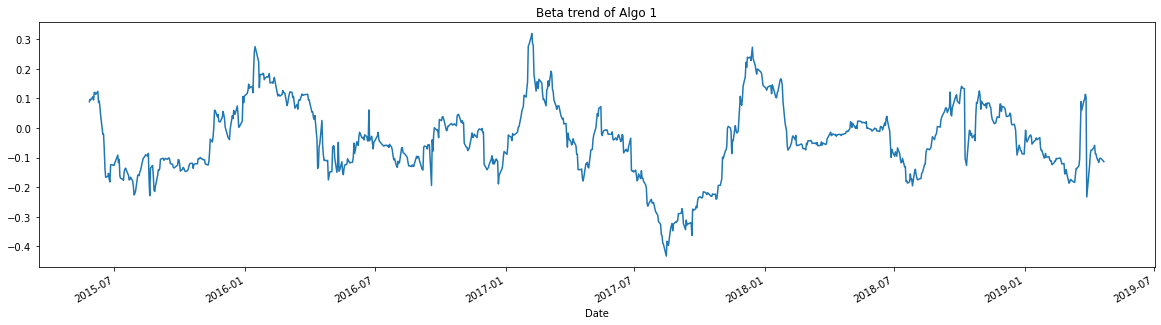

In [1577]:
# Calculate covariance of a single portfolio
rolling_covariance_algo1 = combined_df['Algo1'].rolling(window=60).cov(combined_df['sp500'])
# Calculate variance of S&P 500
rolling_variance_SP500 = combined_df['sp500'].rolling(window=60).var()
# Computing beta
algo1_beta = rolling_covariance_algo1 / rolling_variance_SP500
# Plot beta trend
algo1_beta.plot(figsize=(20,5), title='Beta trend of Algo 1')


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [1578]:
# Use `ewm` to calculate the rolling window
cumul_returns_std.ewm(halflife=21).mean()

Soros        0.073187
Paulson      0.080943
Tiger        0.104606
Berkshire    0.140511
Algo1        0.159988
Algo2        0.154865
sp500        0.148567
dtype: float64

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [1579]:
# Annualized Sharpe Ratios
sharpe_ratio = (daily_returns.mean() - daily_returns['sp500'].mean())/(daily_returns.std())

<AxesSubplot:title={'center':'Daily Sharpe Ratios'}>

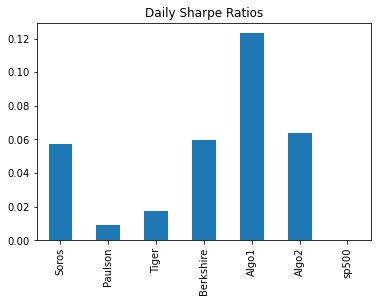

In [1580]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar',  title="Daily Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [1581]:
# Reading data from 1st stock
goog_csv_path = Path("/Users/ericondarza/Desktop/UM-MIA-FINTECH/Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_csv_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

In [1582]:
# Reading data from 2nd stock
cost_csv_path = Path("/Users/ericondarza/Desktop/UM-MIA-FINTECH/Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_csv_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

In [1583]:
# Reading data from 3rd stock
appl_csv_path = Path("/Users/ericondarza/Desktop/UM-MIA-FINTECH/Resources/aapl_historical.csv")
appl_df = pd.read_csv(appl_csv_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)

In [1585]:
# Combine all stocks in a single DataFrame
my_stocks = pd.concat([goog_df, cost_df, appl_df], axis= "columns", join="inner") 
my_stocks.columns['goog','Date', 'cost','Date', 'appl', 'Date']

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# Reset Date index
my_stocks.sort_index(inplace=True)

In [ ]:
# Reorganize portfolio data by having a column per symbol


In [ ]:
# Calculate daily returns
daily_returns = my_stocks.pct_change()

# Drop NAs
daily_returns.dropna(inplace = True)
# Display sample data
daily_returns.describe()

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [ ]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_returns  = daily_returns.dot(weights)
my_portfolio_returns.plot(title= 'Daily Returns for my porfolio')
# Display sample data



## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [ ]:
# Join your returns DataFrame to the original returns DataFrame


In [ ]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!